In [1]:
#Importar librerias para operar datos#

import pandas as pd                     # Pandas para convertir tablas en matrices 
import numpy as np                      # Numpy para realizar operaciones con vectores y matrices
import matplotlib.pyplot as plt         # Matplotlib para graficar los resutlados
import math                             # Operaciones matematicas

In [2]:
#Lectura de datos, Clientes, Matriz de distancia, Demandas#

MatrizDis = pd.read_excel("Padres_MatrizDis.xlsx", sheet_name= "MatrizD")    #Matriz de Distancia
Individuos = pd.read_excel("Padres_MatrizDis.xlsx", sheet_name= "PadresM")   #Solución inicial
Demandas = pd.read_excel("Padres_MatrizDis.xlsx", sheet_name= "Demanda")     #Demanda de cada cliente
Ventanas= pd.read_excel("Padres_MatrizDis.xlsx", sheet_name="Ventanas")      #Ventanas de atención
conver= pd.read_excel("GraficoConvergencia.xlsx", sheet_name="1")            #Datos de Convergencia   

In [16]:
#Convertir hojas del Excel en Data Frame"

dfMatrizDis= pd.DataFrame(MatrizDis)           #Matriz de distancia
dfIndividuos = pd.DataFrame(Individuos)        #Hoja de individuos
dfDemandas = pd.DataFrame(Demandas)            #Hoja de demandas
dfIndividuos = dfIndividuos.fillna(150)        #Convertir en 150 los valores nan de las listas
dfVentanas=pd.DataFrame(Ventanas)
dfconver=pd.DataFrame(conver)

In [19]:
#Crear población inicial en Python, dar un valor inciial a todas las variables globales del sistema#

Poblacion = dfIndividuos.to_numpy().transpose().tolist()            #Trasponer matriz a listas de listas
PoblacionF=[]                                                       #Iniciar varibles globales
hijos=[]                                                            #Iniciar listas para almacenar datos
fitnessFF=[]
fitnessF=[]
CantidadUndVeh = []
DistanciaTotalmodel=[]
dismodel=[]
generaciones=40000                                                  #Definir número de generaciones
Prob_Mut=0.01                                                       #Probabilidad de mutación
hijom=[]
Poblacion_AG=[]
por_mutados= int()                                                  #Contador de cantidad de individuos mutados
Velocidad=37                                                        #Velociad media
Cap_Vehi=93                                                         #Capacidad de cada vehículo#
MatrizViajeF=[]
for i in range(15):                                                 #Crear población inicial sin genes cero
    a = [elemento for elemento in Poblacion[i] if elemento !=150]
    PoblacionF.append(a)
    list(PoblacionF)                                                #Convertir población inicial en una lista con listas
dicVentanas=dict([(i,[a,b]) for i,a,b in zip(dfVentanas['Cliente'],dfVentanas['Ventana I'],dfVentanas['Ventana F'])])

In [18]:
#Función de cruce a dos puntos#
def reproducir():                                                                   #Función
    convergencia(PoblacionF)
    for x in range(generaciones):                                                   #3000 generaciones        
        hijo1=[]                                                                    #Inicio de variables
        hijo2=[]                                
        hijos=[]
        a=np.random.randint(0,14)                                                   #Padres aleatorios
        b=np.random.randint(0,14)                                                   #Padres aleatorios
        tam1=len(PoblacionF[a])
        tam2=len(PoblacionF[b])
        if tam1 <= tam2:
            punto1=np.random.randint(1,math.ceil(tam1/2))                           #Procedimiento aleatorio 
            punto2=np.random.randint((punto1+1),tam1-1)                             #Procedimiento aleatorio
        else:
            punto1=np.random.randint(1,math.ceil(tam2/2))                           #Procedimiento aleatorio 
            punto2=np.random.randint((punto1+1),tam2-1)  
        hijo1[:punto1]=PoblacionF[a][:punto1]                                       #Generación hijo1
        hijo1[punto1:punto2]=PoblacionF[b][punto1:punto2]                               
        hijo1[punto2:]=PoblacionF[a][punto2:]
        hijo2[:punto1]=PoblacionF[b][:punto1]                                       #Generación hijo2
        hijo2[punto1:punto2]=PoblacionF[a][punto1:punto2]
        hijo2[punto2:]=PoblacionF[b][punto2:]
        hijos.append(hijo1)                                                         #Generacíón variable hijos
        hijos.append(hijo2)
        reparacion(hijos)
        adaptacion(hijos)                                                           #Evaluar adaptación
        evaluar_aptitud(hijos)                                                      #Evaluar aptitud

        if ((CantidadUndVeh[-2])<Cap_Vehi and (CantidadUndVeh[-1]) <Cap_Vehi        #Ingresar hijo adaptado 
            and ((fitnessFF[-2]) + (fitnessFF[-1])) <                               #Con mejor aptitud
            ((fitnessF[a]) + (fitnessF[b]))):
            PoblacionF[a]=hijo1
            PoblacionF[b]=hijo2
            convergencia(PoblacionF)
        else:
            convergencia(PoblacionF)
        CantidadUndVeh.clear()                                                      #Reinciiar funciones
        fitnessF.clear()                                                            #Reiniciar funciones
        fitnessFF.clear()                                                           #Reiniciar funciones 
    mutacion(PoblacionF)

In [7]:
#Generar función de adaptación#
def adaptacion(hijos):                                                      #Función  
    DemandaT_Clientes=[]                                                    #Inicio de varaibales
    CapacidadT_veh=[]                                                       #Inicio de lista para almacenar datos      
    a=0      
    b=1
    m=0
    for y in range (len(hijos)):                                            #Evaluar hijos
        for x in range(len(hijos[a])-2):
            Demanda_Cliente= (dfDemandas.iloc[int(hijos[a][b]),1])        #Demanda de cada cliente
            DemandaT_Clientes.append(Demanda_Cliente)                       #Lista con demandas
            b+=1
        CapacidadT_veh = sum(DemandaT_Clientes)                             #Demanda total a atender por vehículo
        CantidadUndVeh.append(CapacidadT_veh)                               #Lista demandas totales para cada vehiculo
        DemandaT_Clientes=[]                                                #Reinicio de variables
        a+=1
        b=1

In [ ]:
#Evalular el individuo funcion fitness#

def evaluar_aptitud(hijos):                         #Función
    aptitud=[]                                      #Inicio de varaibales
    aptitudf=[]                                     #Inicio de varaibales para almacenar datos en listas
    a=0                                              
    b=0                                              
    c=0                                              
    d=1
                                           
    for y in range (len(PoblacionF)):                #Calculo de aptitud para población inicial
        for x in range(len(PoblacionF[a])-1):
            i = PoblacionF[a][b]
            j = PoblacionF[c][d]
            b+=1 
            d+=1
            disTotal= (dfMatrizDis.loc[i,j]) 
            aptitud.append(disTotal)                 #Distancia a cada punto del total de individuo
            fitness= (sum(aptitud))                  #Suma distancia total recorrida por el individuo
        fitnessF.append(fitness)                     #Crea una lista con el valor de cada fitness
        aptitud=[]                                   #Reinicia el valor de la lista de aptitud, no acumular distancia
        b=0                                          #Reiniciar el valor de la posición de los genes en el cromosoma
        d=1
        a+=1
        c+=1
    a=0                                              
    b=0                                              
    c=0                                              
    d=1
    for y in range (len(hijos)):                      #Calculo de aptitud para los hijos generados
        for x in range(len(hijos[a])-1):
            i = hijos[a][b]
            j = hijos[c][d]
            b+=1 
            d+=1
            disTotalf= (dfMatrizDis.loc[i,j]) 
            aptitudf.append(disTotalf)                #Distancia a cada punto del total de hijos
            fitnessf= (sum(aptitudf))                 #Suma distancia total recorrida por el hijo
        fitnessFF.append(fitnessf)                    #Crea una lista con el valor de cada fitness para cada hijo
        aptitudf=[]                                   #Reinicia el valor de la lista de aptitud, no acumular distancia
        b=0                                           #Reiniciar el valor de la posición de los genes en el cromosoma
        d=1
        a+=1
        c+=1
    #print(fitnessF)
    #print(sum(fitnessF))
#evaluar_aptitud(PoblacionF)

In [9]:
#Función para guardar distancia total del modelo#
def convergencia(PoblacionF):                         #Función para guardar los mejores resultados
    aptitudC=[]                                       #Inicio de varaibales
    fitnessFC=[]                                      
    a=0                                              
    b=0                                              
    c=0                                              
    d=1
                                           
    for y in range (len(PoblacionF)):                 #Calculo de aptitud para población cruzada
        for x in range(len(PoblacionF[a])-1):
            i = PoblacionF[a][b]
            j = PoblacionF[c][d]
            b+=1 
            d+=1
            disTotalC= (dfMatrizDis.loc[i,j]) 
            aptitudC.append(disTotalC)                 #Distancia a cada punto del total de individuo cruzado
            fitnessC= (sum(aptitudC))                  #Suma distancia total recorrida por el individuo cruzado
        fitnessFC.append(fitnessC)                     #Crea una lista con el valor de cada fitness de los hijos
        aptitudC=[]                                    #Reinicia el valor de la lista de aptitud, no acumular distancia
        b=0                                            #Reiniciar el valor de la posición de los genes en el cromosoma
        DistanciaTotalmodel = sum(fitnessFC)
        d=1
        a+=1
        c+=1
    dismodel.append(DistanciaTotalmodel)

In [10]:
#Función de mutación#

def mutacion(PoblacionF):                                             #Función de mutación 
    e=0                                                               #Inicio de variables a operar
    f=1
    a=0
    por_mutados=0                                                     #Contador de individuos mutados
    dis_mut=[]                                                        #Inicio de variables listas para almacenar datos
    DisTM=[]
    fitnessM=[]
    hijom=[]
    for i in range(len(PoblacionF)):                                  #Bucle para evaluar si un individuo muta o no
        for j in range(200):
            if np.random.random()<=Prob_Mut:                          #Generación de número aleatorio <0.01
                evaluar_aptitud(PoblacionF)
                fitnessF.clear()
                evaluar_aptitud(PoblacionF)
                puntoM1=np.random.randint(1,((int(len(PoblacionF[a]))-1)))   #Generación de número aleatorio para mutar
                puntoM2=np.random.randint(1,((int(len(PoblacionF[a]))-1)))   #Generación de número aleatorio para mutar
                hijom=[i for i in (PoblacionF[a])]
                x=hijom[puntoM1]                                    
                y=hijom[puntoM2]
                hijom[puntoM1]=y                                      #Mutación
                hijom[puntoM2]=x                                      #Mutación
                for s in range(len(hijom)-1):
                    m= (hijom[e])
                    n= (hijom[f])
                    dis_mut= (dfMatrizDis.loc[m,n])
                    DisTM.append(dis_mut)
                    fitnessM=sum(DisTM)
                    e+=1
                    f+=1
                if int(fitnessM) < int(fitnessF[a]):                  #Ingreso del individuo mutado a la población
                    por_mutados+=1
                    PoblacionF[a]=hijom
                    convergencia(PoblacionF)                          #Almacena datos de la solución final
                else:
                    convergencia(PoblacionF)
            e=0                                                       #Reinicio de variables
            f=1
            DisTM=[] 
        a+=1
    fitnessF.clear()

In [11]:
#Función de reparación Ventanas de tiempo hijos no factibles#

def reparacion(hijos):                                  #Función reparación hijos generados
    distanciaspp=[]                                     #Inicio valores de la variables
    distanciasppI=[]                                    
    MatrizViaje=[]
    MatrizViajeF=[]
    a=0                                                 #Inicio valores de la variables                          
    b=0                                              
    c=0                                              
    d=1
    for y in range (len(hijos)):                        #Calculo matriz de tiempo de viaje de un nodo a otro
        for x in range(len(hijos[a])-1):
            i = hijos[a][b]
            j = hijos[c][d]
            b+=1 
            d+=1
            disTotal= (dfMatrizDis.loc[i,j])            #Calculo de distancia de un nodo a otro
            distanciaspp.append(disTotal)               #Distancia a cada punto del total de individuo
        distanciasppI.append(distanciaspp)
        b=0                                             #Reiniciar el valor de la posición de los genes en el cromosoma
        d=1                                             
        a+=1
        c+=1
        distanciaspp=[]                                 #Reiniciar lista para no acumular distancias      
    a=0                                              
    b=0                                              
    c=0                                              
    d=1
    for j in range(len(distanciasppI)):                 #Calculo matriz de tiempo de un nodo i a un nodo j
        for i in distanciasppI[a]:
            MatrizViaje.append((i/Velocidad))
        MatrizViajeF.append(MatrizViaje)                #Realiza matriz de tiempos de viaje
        MatrizViaje=[]        
        a+=1
    a=0
    b=1
    c=0
    d=0
    for y in range(len(hijos)):                         #Evalua cada hijo generado para ver si su solución es factible
        for x in range(len(hijos[a])):
            if ((dicVentanas[(hijos[a][b])][0]+0.25+MatrizViajeF[a][c])) > int(dicVentanas[(hijos[a][b+1])][1]):
                hijos[a][b],hijos[a][b+1]=hijos[a][b+1],hijos[a][b]
                reparacion(hijos)                       #Recalcula los tiempos de viaje luego de la agrupación
            else:
                (dicVentanas[(hijos[a][b+1])][0]) = int((dicVentanas[(hijos[a][b])][0]+0.25+MatrizViajeF[a][c]))
            b+=1                                        #Coloca los tiempos de llegada a cada punto
            c+=1                                        #Reinicio de variables para repetir el proceso
        a+=1
        b=1
        c=0
        d=0

In [20]:
#Función para graficar los resultados en una grafica de convergencia#
def grafico():                          #Función grafico
    x=[]                                #Inicio de variables 
    for i in range(len(dismodel)):      #Creación eje X
        x.append(i)
    plt.plot(x,dismodel,linestyle='--',color= 'g') 
    plt.title("Convergencia AG")
    plt.xlabel('Número de Generaciones')
    plt.ylabel('Aptitud de los mejores individuos')

[[0.0, 51.0, 74.0, 36.0, 14.0, 15.0, 21.0, 98.0, 50.0, 45.0, 115.0, 65.0, 113.0, 16.0, 0.0], [0.0, 5.0, 139.0, 120.0, 7.0, 18.0, 114.0, 37.0, 131.0, 46.0, 0.0], [0.0, 52.0, 3.0, 63.0, 87.0, 26.0, 49.0, 73.0, 24.0, 103.0, 138.0, 72.0, 0.0], [0.0, 56.0, 44.0, 95.0, 53.0, 22.0, 71.0, 48.0, 11.0, 90.0, 122.0, 64.0, 0.0], [0.0, 137.0, 67.0, 134.0, 88.0, 124.0, 93.0, 19.0, 110.0, 136.0, 30.0, 112.0, 31.0, 81.0, 96.0, 0.0], [0.0, 135.0, 68.0, 89.0, 28.0, 109.0, 40.0, 76.0, 118.0, 0.0], [0.0, 91.0, 62.0, 117.0, 108.0, 104.0, 129.0, 107.0, 0.0], [0.0, 47.0, 25.0, 39.0, 85.0, 119.0, 80.0, 2.0, 0.0], [0.0, 6.0, 126.0, 105.0, 100.0, 128.0, 10.0, 27.0, 58.0, 82.0, 99.0, 111.0, 77.0, 0.0], [0.0, 94.0, 66.0, 92.0, 130.0, 0.0], [0.0, 132.0, 9.0, 60.0, 13.0, 35.0, 86.0, 57.0, 70.0, 123.0, 0.0], [0.0, 140.0, 127.0, 116.0, 55.0, 41.0, 43.0, 101.0, 133.0, 61.0, 38.0, 29.0, 59.0, 42.0, 106.0, 0.0], [0.0, 20.0, 12.0, 1.0, 83.0, 97.0, 4.0, 17.0, 69.0, 121.0, 79.0, 8.0, 102.0, 32.0, 0.0], [0.0, 34.0, 84.0, 12

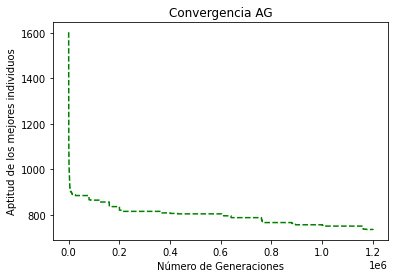

In [22]:
for x in range(30):
    reproducir()
grafico()
print(PoblacionF)

In [120]:

convergencia(PoblacionF)
df = pd.DataFrame(dismodel)
df.to_excel("GraficoConvergencia2.xlsx", sheet_name="1")


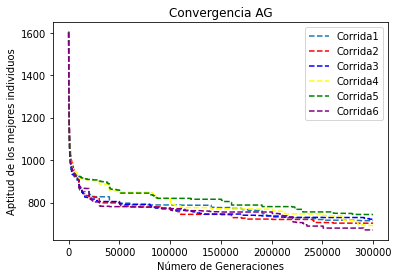

In [124]:
ax=plt.gca()
dfconver.plot(kind='line',x='Generación',y='Corrida1',linestyle='--',ax=ax)
dfconver.plot(kind='line',x='Generación',y='Corrida2',linestyle='--',color='red',ax=ax)
dfconver.plot(kind='line',x='Generación',y='Corrida3',linestyle='--',color='blue',ax=ax)
dfconver.plot(kind='line',x='Generación',y='Corrida4',linestyle='--',color='yellow',ax=ax)
dfconver.plot(kind='line',x='Generación',y='Corrida5',linestyle='--',color='green',ax=ax)
dfconver.plot(kind='line',x='Generación',y='Corrida6',linestyle='--',color='purple',ax=ax)
plt.title("Convergencia AG")
plt.xlabel('Número de Generaciones')
plt.ylabel('Aptitud de los mejores individuos')
plt.show()